<a href="https://colab.research.google.com/github/salim-hbk/ai-ml/blob/main/Regression_and_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [ ]:
zip_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip'

import urllib
import zipfile

url = zip_url
extract_dir = "sample_data"

zip_path, _ = urllib.request.urlretrieve(url)
with zipfile.ZipFile(zip_path, "r") as f:
    f.extractall(extract_dir)


In [ ]:
df = pd.read_csv('./sample_data/student-mat.csv',sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [3]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', names=['Sex', 'Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings'])
df.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.describe()

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [5]:
data = df.copy()

In [6]:
#dummy_vals = pd.get_dummies(data['Sex'])
data['Sex'] = data['Sex'].map({'M':0, 'F':1, 'I':2})

In [ ]:
#dummy_vals.reset_index(drop=True, inplace=True)

In [7]:
#new_data = pd.concat([data.reset_index(drop=True), dummy_vals.reset_index(drop=True)], axis=1)
data.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
#final_data = new_data.copy()

In [ ]:
#final_data.drop('Sex', axis=1, inplace=True)
#final_data.head()

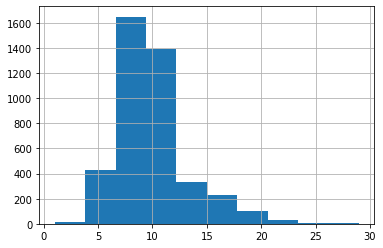

In [8]:
data['Rings'].hist()

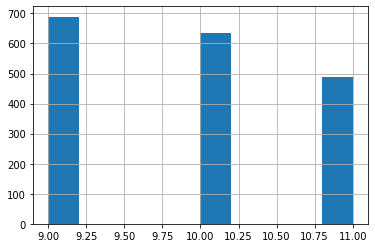

In [43]:
data = data[((data['Rings']>8) & (data['Rings']<12))]
data = data.reset_index(drop=True)
data['Rings'].hist()

In [44]:
def format_output(data):
  Sex = data.pop('Sex')
  Sex = np.array(Sex)
  Rings = data.pop('Rings')
  Rings = np.array(Rings)
  return (Rings, Sex)

In [45]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state = 1)
train_x =  train[train.columns[1:-1]]
test_x = test[test.columns[1:-1]]

train_y = format_output(train)
test_y  = format_output(test)

In [46]:
print(train_x.count())
print(test_x.count())

Length           1448
Diameter         1448
Height           1448
WholeWeight      1448
ShuckedWeight    1448
VisceraWeight    1448
ShellWeight      1448
dtype: int64
Length           362
Diameter         362
Height           362
WholeWeight      362
ShuckedWeight    362
VisceraWeight    362
ShellWeight      362
dtype: int64


In [47]:
train_stats = train_x.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Length,1448.0,0.570294,0.088915,0.2800,0.520000,0.58000,0.63000,0.7800
Diameter,1448.0,0.445283,0.072691,0.2050,0.400000,0.45500,0.49500,0.6300
Height,1448.0,0.151733,0.030418,0.0150,0.135000,0.15000,0.17000,0.5150
WholeWeight,1448.0,0.984152,0.428898,0.1200,0.685500,0.97025,1.25425,2.6570
ShuckedWeight,1448.0,0.440198,0.209522,0.0415,0.289875,0.43750,0.57075,1.4880
VisceraWeight,1448.0,0.217438,0.098625,0.0240,0.146500,0.21025,0.28150,0.5745
ShellWeight,1448.0,0.274192,0.109706,0.0400,0.195000,0.27425,0.34400,0.6745


In [48]:
def norm(data):
  return (data - train_stats['mean'])/train_stats['std']

In [49]:
norm_train_x = norm(train_x)
norm_test_x = norm(test_x)

In [56]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

In [51]:
def base_net(input):
  x = tf.keras.layers.Dense(128, activation='linear')(input)
  return x

In [52]:
input_layer = tf.keras.layers.Input(shape=[7])
base_input = base_net(input_layer)
output_regression = tf.keras.layers.Dense(1, activation='linear', name='output_regression')(base_input)
output_classification = tf.keras.layers.Dense(3, activation='softmax', name='output_classification' )(base_input)
model = tf.keras.models.Model(inputs=input_layer, outputs=[output_regression, output_classification])

In [53]:
model.compile(optimizer='sgd', loss={'output_regression': 'mse', 'output_classification': 'sparse_categorical_crossentropy'})
model.fit(norm_train_x, train_y, epochs=600)

Epoch 1/600
46/46 [==============================] - 0s 1ms/step - loss: 34.3027 - output_regression_loss: 33.1711 - output_classification_loss: 1.1317
Epoch 2/600
46/46 [==============================] - 0s 1ms/step - loss: 1.5992 - output_regression_loss: 0.6128 - output_classification_loss: 0.9863
Epoch 3/600
46/46 [==============================] - 0s 1ms/step - loss: 1.5968 - output_regression_loss: 0.6302 - output_classification_loss: 0.9666
Epoch 4/600
46/46 [==============================] - 0s 1ms/step - loss: 1.5822 - output_regression_loss: 0.6057 - output_classification_loss: 0.9765
Epoch 5/600
46/46 [==============================] - 0s 1ms/step - loss: 1.5816 - output_regression_loss: 0.6264 - output_classification_loss: 0.9552
Epoch 6/600
46/46 [==============================] - 0s 1ms/step - loss: 1.5506 - output_regression_loss: 0.6035 - output_classification_loss: 0.9472
Epoch 7/600
46/46 [==============================] - 0s 1ms/step - loss: 1.6319 - output_regressio

In [54]:
test_one = norm_test_x[0:][:1]
model.predict(test_one)

[array([[9.612353]], dtype=float32),
 array([[0.38806   , 0.25256836, 0.35937163]], dtype=float32)]

In [55]:
test_y[0][0], test_y[1][0]

(10, 2)

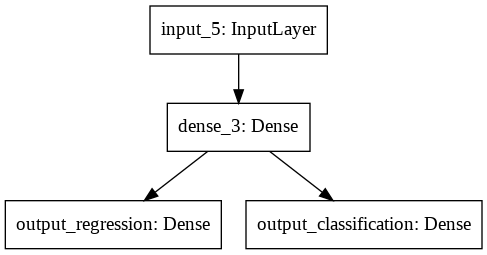

In [57]:
plot_model(model)